Data Analytics Immersion Exercise 4.10 Part 1 A

Creating Region variable

Comparing spending_flag by region

Removing low-activity customers from data set

Creating age group variable

Creating bar chart of age group distribution

Creating income variable

Creating bar chart of income distribution

Creating department groups

Merging department dataframe into main dataframe

Creating provider status variable

Converting datatypes in dataframe to conserve memory

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import scipy

In [2]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Instacart Basket Analysis"

In [3]:
#Importing Data

df_tot = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'total.pkl'))

In [4]:
#Checking data

df_tot.shape

(32406041, 32)

In [5]:
df_tot.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The names would be considered PII, especially with the other descriptive columns (gender, state, age, dependants, and fam_status).  Given that no real marketing information can be accurately taken from someone's name, it seems best to wipe out those columns and preserve the other descriptive columns.

In [6]:
#Dropping name columns

df_totf = df_tot.drop(columns = ['First Name', 'Surname'])

In [7]:
#Data checks

df_totf.shape

(32406041, 30)

In [8]:
df_totf.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
#Confirming states column has no duplicates/mispellings

df_totf['STATE'].value_counts(dropna = False)

STATE
Pennsylvania            667094
California              659828
Rhode Island            656935
Georgia                 656414
New Mexico              654499
Arizona                 654005
North Carolina          651928
Oklahoma                651760
Alaska                  648519
Minnesota               647851
Massachusetts           646378
Wyoming                 644283
Virginia                641432
Missouri                640761
Texas                   640432
Colorado                639293
Maine                   638593
North Dakota            638507
Alabama                 638041
Kansas                  637570
Louisiana               637506
Delaware                637049
South Carolina          636768
Oregon                  636442
Nevada                  636163
Arkansas                636158
New York                636003
Montana                 635280
South Dakota            633786
Illinois                633059
Hawaii                  632922
Washington              632877
Mi

In [8]:
#Assigning Northeast region

df_totf.loc[df_totf['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
                                   'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [9]:
#Assigning Midwest region

df_totf.loc[df_totf['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 
                                   'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [10]:
#Assigning South region

df_totf.loc[df_totf['STATE'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
                                  'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [11]:
#Assigning West region

df_totf.loc[df_totf['STATE'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
                                   'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [12]:
#Checking data

df_totf['Region'].value_counts(dropna = False)

Region
South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: count, dtype: int64

Determining spending habits (region v spending flag)

In [15]:
#Creating crosstab comparing spending_flags per region

crosstabrs = pd.crosstab(df_totf['Region'], df_totf['spending_flag'], dropna = False)

In [16]:
#Copying crosstabrs to clipboard to examine in excel

crosstabrs.to_clipboard()

In [17]:
print(crosstabrs)

spending_flag  High spender  Low spender
Region                                  
Midwest              155979      7441606
Northeast            108226      5614713
South                209693     10582607
West                 160354      8132863


In [18]:
#Creating new column to display percentage of high spenders

crosstabrs['High spender %'] = crosstabrs['High spender'] / (crosstabrs['High spender'] + crosstabrs['Low spender']) * 100

In [19]:
crosstabrs

spending_flag,High spender,Low spender,High spender %
Region,,,
Midwest,155979,7441606,2.053008
Northeast,108226,5614713,1.891091
South,209693,10582607,1.942987
West,160354,8132863,1.933556


The region with the highest total amount of High spenders is the southern region while the region with the highest percentage of high spenders is the midwestern region

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
#Creating exclusion flag of low activity for max_orders <5

df_totf.loc[df_totf['max_order'] < 5, 'Activity_flag'] = 'Low'

In [14]:
df_totf.loc[df_totf['max_order'] >= 5, 'Activity_flag'] = 'Active'

In [15]:
df_totf['Activity_flag'].value_counts(dropna = False)

Activity_flag
Active    30965686
Low        1440355
Name: count, dtype: int64

In [16]:
#Creating subset for CFO request

df_CFO = df_totf[df_totf['Activity_flag'] == 'Active']

In [17]:
df_CFO['Activity_flag'].value_counts(dropna = False)

Activity_flag
Active    30965686
Name: count, dtype: int64

In [25]:
df_CFO.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CFO activity request.pkl'))

In [18]:
#Setting working dataframe to dataframe requested by CFO

df = df_CFO

In [19]:
df['Activity_flag'].value_counts(dropna = False)

Activity_flag
Active    30965686
Name: count, dtype: int64

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [28]:
#Gathering data on age for min, max

df['Age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [24]:
#Creating age variables

df.loc[df['Age'] < 30, 'Age group'] = 'Young adult'

In [21]:
df.loc[(df['Age'] >= 30) & (df['Age'] < 45), 'Age group'] = 'Adult'

In [22]:
df.loc[(df['Age'] >= 45) & (df['Age'] < 65), 'Age group'] = 'Middle aged'

In [23]:
df.loc[df['Age'] >= 65, 'Age group'] = 'Elderly'

In [25]:
df['Age group'].value_counts(dropna = False)

Age group
Middle aged    9690405
Elderly        8195806
Adult          7261624
Young adult    5817851
Name: count, dtype: int64

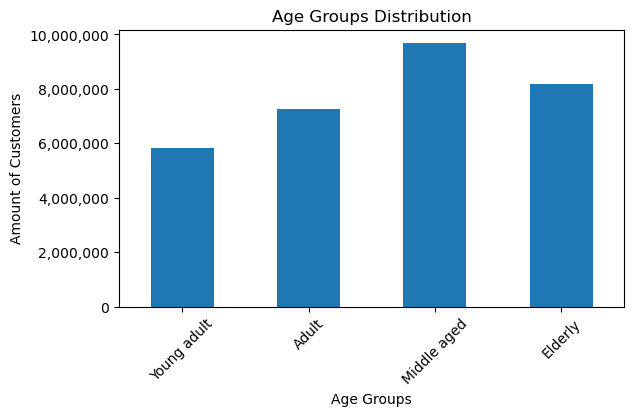

In [28]:
#Creating bar chart of age groups

Age_bar = df['Age group'].value_counts().sort_index().plot.bar()

plt.title('Age Groups Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Amount of Customers')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Remvoing scientific notation
Age_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Setting index by age group ascending
age_order = ['Young adult', 'Adult', 'Middle aged', 'Elderly']
df['Age group'] = pd.Categorical(df['Age group'], categories=age_order, ordered=True)
df = df.sort_values('Age group')

#Exporting chart
Age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age Group Bar.png'))

In [29]:
#Pulling statistics on income to designate variables

df['income'].describe()

count    3.096569e+07
mean     9.967573e+04
std      4.314168e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
#Designating income into three tiers; lower, middle, and high

df.loc[df['income'] < 50000, 'Income Bracket'] = 'Low Income'

In [31]:
df.loc[(df['income'] >= 50000) & (df['income'] < 100000), 'Income Bracket'] = 'Middle Income'

In [32]:
df.loc[df['income'] >= 100000, 'Income Bracket'] = 'High Income'

In [33]:
df['Income Bracket'].value_counts(dropna = False)

Income Bracket
High Income      14207890
Middle Income    13395113
Low Income        3362683
Name: count, dtype: int64

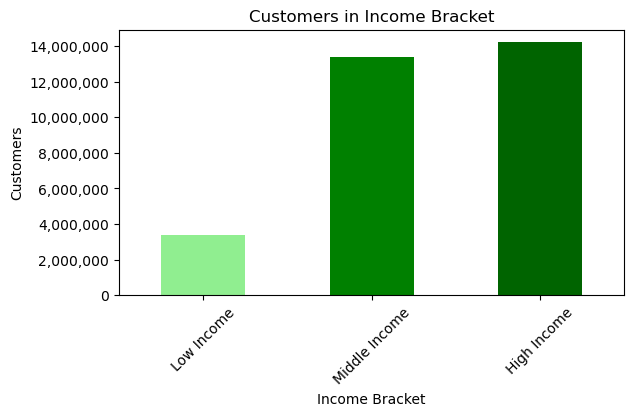

In [35]:
#Creating bar chart of income groups

Income_bar = df['Income Bracket'].value_counts().sort_index().plot.bar(color = ['lightgreen', 'green', 'darkgreen'])

plt.title('Customers in Income Bracket')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Removing scientific notation
Income_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Resetting Income Bracket index
income_order = ['Low Income', 'Middle Income', 'High Income']
df['Income Bracket'] = pd.Categorical(df['Income Bracket'], categories=income_order, ordered=True)
df = df.sort_values('Income Bracket')

#Exporting chart
Income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income Distibution Bar.png'))

In [78]:
#Establishing department groups

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30965686 entries, 1841487 to 30965685
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int16   
 11  department_id                  int8    
 12  prices                         float64 
 13  price_range_loc                category
 14  busiest_day                    category
 15  busiest_period_of_day          category
 16  max_order                      int16   
 17  loyalty_flag            

In [36]:
#Need to pull in departments data into dataframe

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [43]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [37]:
#Changing column name of Unnamed: 0 to department_id to accommodate merge

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [38]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
#Will merge df_dept with df

df = df.merge(df_dept, on = 'department_id')

In [40]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,dependants,fam_status,income,_merge,Region,Activity_flag,Age group,Income Bracket,department
0,2191680,151102,40,4,8,3.0,23565,3,0,Jamon Serrano Dry Cured Ham,...,2/4/2019,0,single,41535,both,Northeast,Active,Middle aged,Low Income,deli
1,536210,141401,14,5,10,3.0,14764,8,1,Organic Sprouted Wheat Bagels,...,9/18/2019,2,married,33437,both,Midwest,Active,Adult,Low Income,bakery
2,2428734,141401,15,2,11,4.0,9155,1,0,Spinach Dip,...,9/18/2019,2,married,33437,both,Midwest,Active,Adult,Low Income,deli
3,1321435,141401,6,4,9,1.0,7139,1,0,Sooo Good Light Roast Coffee,...,9/18/2019,2,married,33437,both,Midwest,Active,Adult,Low Income,beverages
4,3124554,141401,5,3,9,5.0,22035,11,1,Organic Whole String Cheese,...,9/18/2019,2,married,33437,both,Midwest,Active,Adult,Low Income,dairy eggs


In [41]:
df['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           671872
personal care       424359
babies              410392
international       255991
alcohol             144674
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [42]:
#Will create groups of departments

df.loc[df['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods',
                              'deli', 'dry goods pasta', 'meat seafood', 'breakfast', 'personal care', 'international',
                              'alcohol']), 'Department group'] = 'Foods'

In [43]:
df.loc[df['department'].isin(['household', 'personal care', 'babies', 'pets', 'missing', 'other', 'bulk']), 'Department group'] = 'Non-food Misc'

In [44]:
df['Department group'].value_counts(dropna = False)

Department group
Foods            29205388
Non-food Misc     1760298
Name: count, dtype: int64

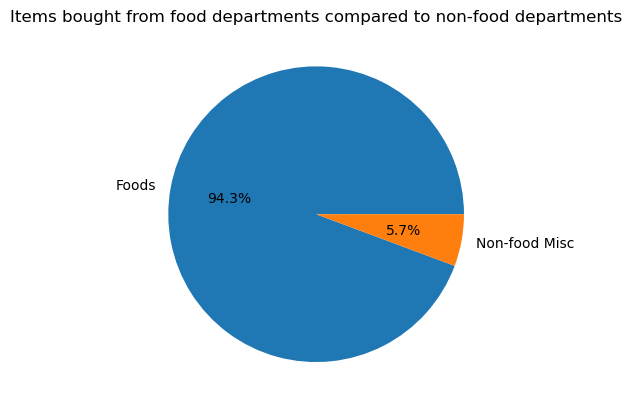

In [45]:
#Creating pie chart of departments

#Plotting pie chart
dept_group_counts = df['Department group'].value_counts()
dept_pie = dept_group_counts.plot.pie(autopct='%1.1f%%')

#Customizing chart
plt.ylabel('')
plt.title('Items bought from food departments compared to non-food departments')

#Exporting chart
dept_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Food Pie.png'))

In [53]:
#Creating variable based on number of dependants and fam_status

df[['dependants', 'fam_status']].value_counts(dropna = False)

dependants  fam_status                      
3           married                             7284299
2           married                             7248829
1           married                             7211334
0           single                              5094645
            divorced/widowed                    2645371
1           living with parents and siblings     508060
3           living with parents and siblings     488477
2           living with parents and siblings     484671
Name: count, dtype: int64

In [54]:
df['fam_status'].value_counts(dropna = False)

fam_status
married                             21744462
single                               5094645
divorced/widowed                     2645371
living with parents and siblings     1481208
Name: count, dtype: int64

Every single fam_status of married has dependants > 0, which doesn't seem right unless dependants means other people in your household.  I'm going to create variables with the assumption that a married status with dependants of 1 is in reference to their spouse, and not a child or infirm parent.  Essentially, married with dependants = 1 is going to mean dual income, no kids, an important growing group.

Another issue is that all single listings have dependants listed as 0, which means no single parents?

Final issue is living with parents and siblings all have dependants > 0, but you wouldn't list a parent or sibling as dependant unless they were infirm/disabled in some way

The groups will be listed as follows with the following definitions:

married with dependants = 1 will mean married, no dependants 'married, no dep'
married with dependants > 1 will mean married with dependants, 'married, dep'
single and divored/widowed will mean a single adult with no dependants 'single, no dep'
living with parents and siblings will mean a single adult with dependants, including the possibility of their own children 'single, dep'


In [46]:
#Creating Provider status variable

df.loc[(df['fam_status'] == 'married') & (df['dependants'] == 1), 'Provider status'] = 'married, no dep'

In [47]:
df.loc[(df['fam_status'] == 'married') & (df['dependants'].isin([2, 3])), 'Provider status'] = 'married, dep'

In [48]:
df.loc[df['fam_status'].isin(['single', 'divorced/widowed']), 'Provider status'] = 'single, no dep'

In [49]:
df.loc[(df['fam_status'] == 'living with parents and siblings'), 'Provider status'] = 'single, dep'

In [50]:
df['Provider status'].value_counts(dropna = False)

Provider status
married, dep       14533128
single, no dep      7740016
married, no dep     7211334
single, dep         1481208
Name: count, dtype: int64

In [51]:
#Reordering provider status index

provider_order = ['single, no dep', 'single, dep', 'married, no dep', 'married, dep']
df['Provider status'] = pd.Categorical(df['Provider status'], categories=provider_order, ordered=True)
df = df.sort_values('Provider status')

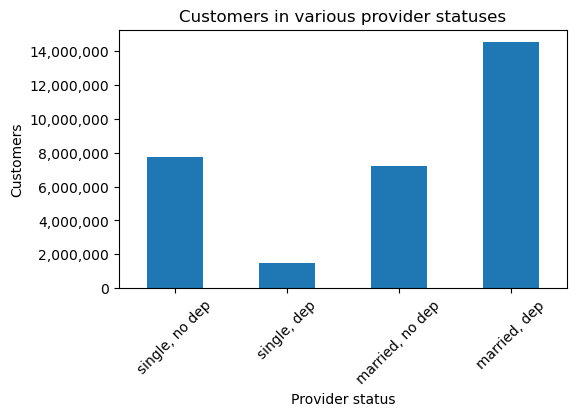

In [52]:
#Creating provider bar chart

provider_bar = df['Provider status'].value_counts().sort_index().plot.bar()

#Removing scientific notation
provider_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Customizing bar chart
plt.title('Customers in various provider statuses')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Exporting
provider_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Provider status.png'))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30965686 entries, 0 to 30965685
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_period_of_day          object  
 16  max_order                      int64   
 17  loyalty_flag                  

In [63]:
#Converting columns from object to category for memory usage

cat_cols = ['aisle_id', 'department_id', 'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
            'frequency_flag', 'Gender', 'STATE', 'fam_status', 'Region', 'Activity_flag', 'department', 'Department group']

In [64]:
df[cat_cols] = df[cat_cols].astype('category')

In [65]:
#Converting integer types for memory usage

df['orders_day_of_week'] = df['orders_day_of_week'].astype('int8')
df['order_hour_of_day'] = df['order_hour_of_day'].astype('int8')
df['reordered'] = df['reordered'].astype('int8')
df['aisle_id'] = df['aisle_id'].astype('int16')
df['department_id'] = df['department_id'].astype('int8')
df['max_order'] = df['max_order'].astype('int16')
df['Age'] = df['Age'].astype('int8')
df['dependants'] = df['dependants'].astype('int8')
df['income'] = df['income'].astype('int32')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30965686 entries, 0 to 30965685
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int16   
 11  department_id                  int8    
 12  prices                         float64 
 13  price_range_loc                category
 14  busiest_day                    category
 15  busiest_period_of_day          category
 16  max_order                      int16   
 17  loyalty_flag                  

In [68]:
#Exporting Data

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CFO updated.pkl'))